In [2]:
#DATA EXPLORATION

library(RColorBrewer)

customerData = read.csv("Mall_Customers.csv")

str(customerData)

names(customerData)

head(customerData)

summary(customerData$Age)

sd(customerData$Age)

summary(customerData$Annual.Income..k..)

sd(customerData$Annual.Income..k..)

sd(customerData$Spending.Score..1.100.)

'data.frame':	200 obs. of  5 variables:
 $ CustomerID            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Gender                : Factor w/ 2 levels "Female","Male": 2 2 1 1 1 1 1 1 2 1 ...
 $ Age                   : int  19 21 20 23 31 22 35 23 64 30 ...
 $ Annual.Income..k..    : int  15 15 16 16 17 17 18 18 19 19 ...
 $ Spending.Score..1.100.: int  39 81 6 77 40 76 6 94 3 72 ...


[1] "CustomerID"             "Gender"                 "Age"                   
[4] "Annual.Income..k.."     "Spending.Score..1.100."

,CustomerID,Gender,Age,Annual.Income..k..,Spending.Score..1.100.
,<int>,<fct>,<int>,<int>,<int>
1,1,Male,19,15,39
2,2,Male,21,15,81
3,3,Female,20,16,6
4,4,Female,23,16,77
5,5,Female,31,17,40
6,6,Female,22,17,76


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 

[1] 13.96901

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   41.50   61.50   60.56   78.00  137.00 

[1] 26.26472

[1] 25.82352

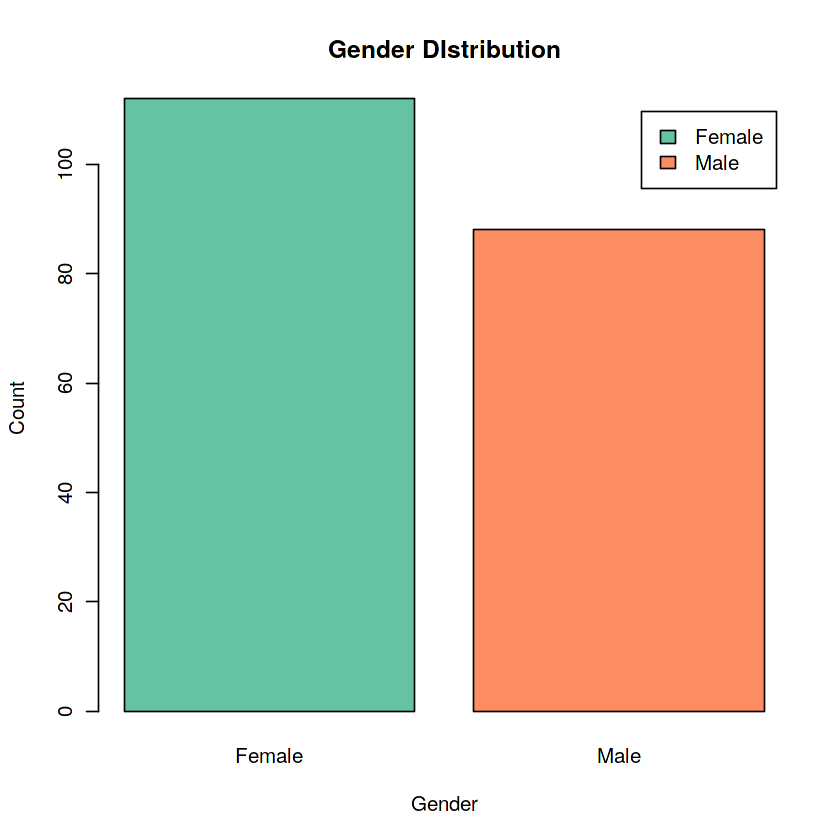

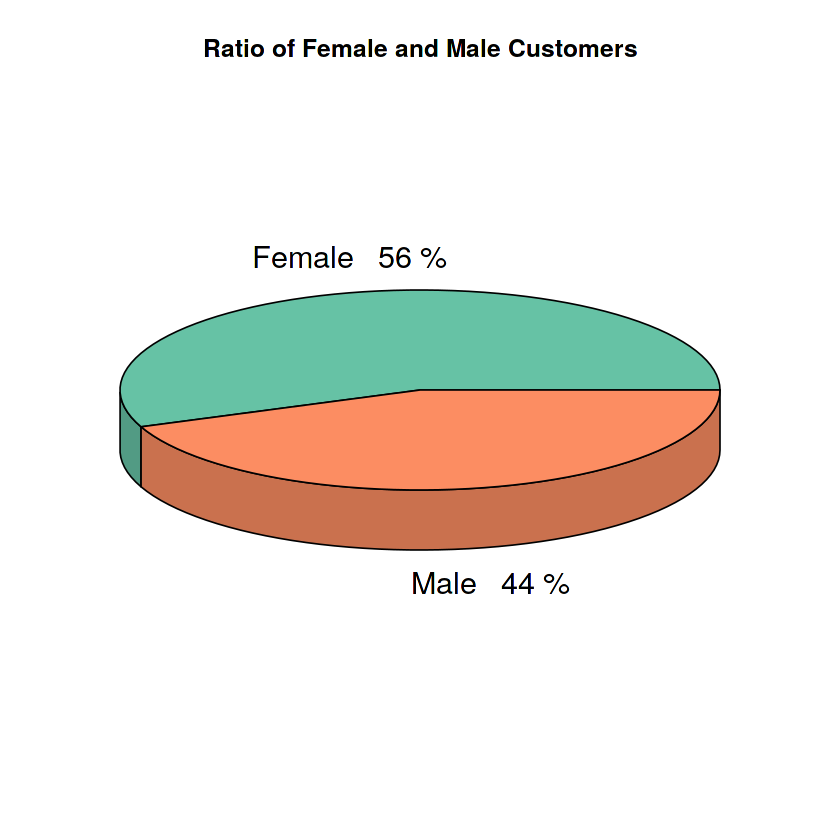

In [3]:
#CUSTOMER GENDER VISUALIZATION

a=table(customerData$Gender)
barplot(a,main="Gender DIstribution",
        ylab="Count",
        xlab="Gender",
        col=brewer.pal(n = 3, name = 'Set2'),
        legend=rownames(a))

pct=round(a/sum(a)*100)

lbs=paste(c("Female","Male")," ",pct,"%",sep=" ")

library(plotrix)

pie3D(a,labels=lbs,
      main="Ratio of Female and Male Customers",
      col=brewer.pal(n = 3, name = 'Set2'))


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 

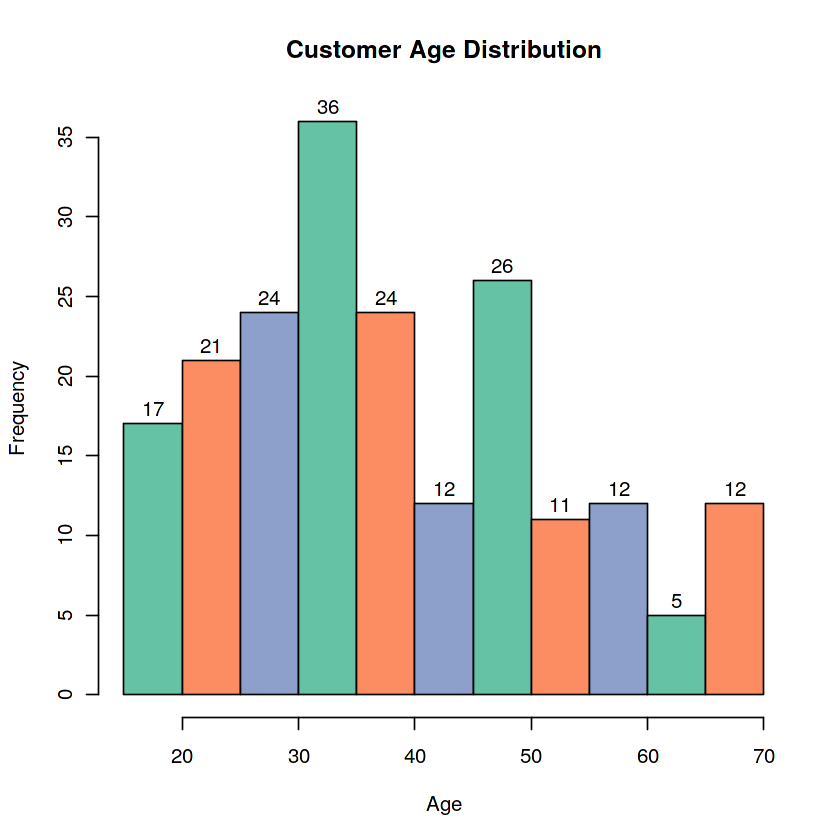

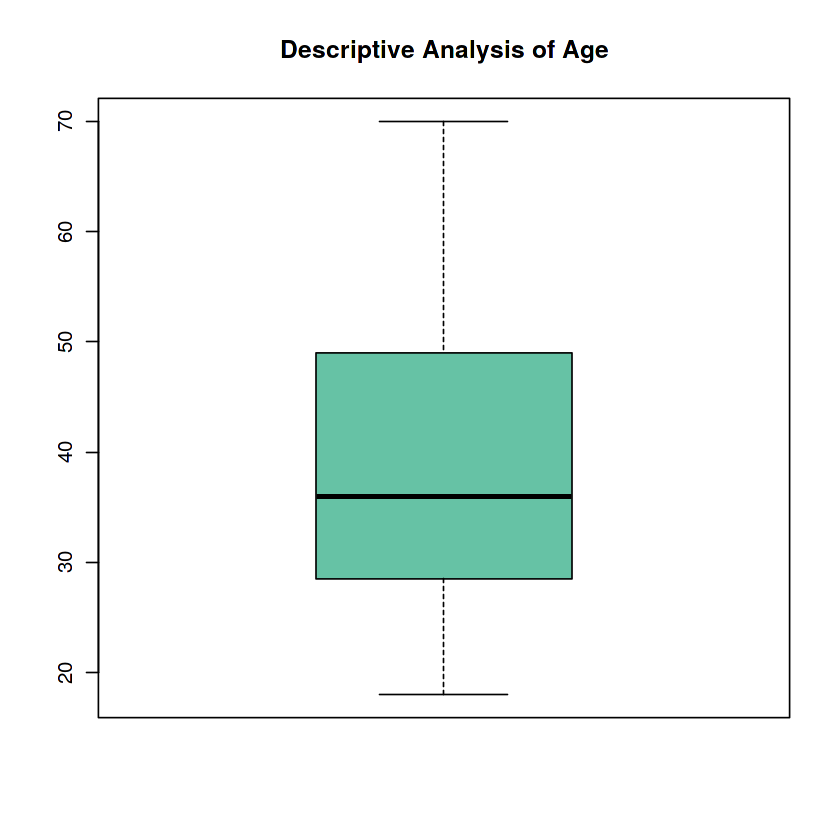

In [4]:
#VISUALIZATION OF AGE DISTRIBUTION

summary(customerData$Age)

hist(customerData$Age,
     main="Customer Age Distribution",
     col=brewer.pal(n = 3, name = 'Set2'),
     xlab="Age",
     ylab="Frequency",
     labels=TRUE)

boxplot(customerData$Age,
        col=brewer.pal(n = 3, name = 'Set2'),
        main="Descriptive Analysis of Age")


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   41.50   61.50   60.56   78.00  137.00 

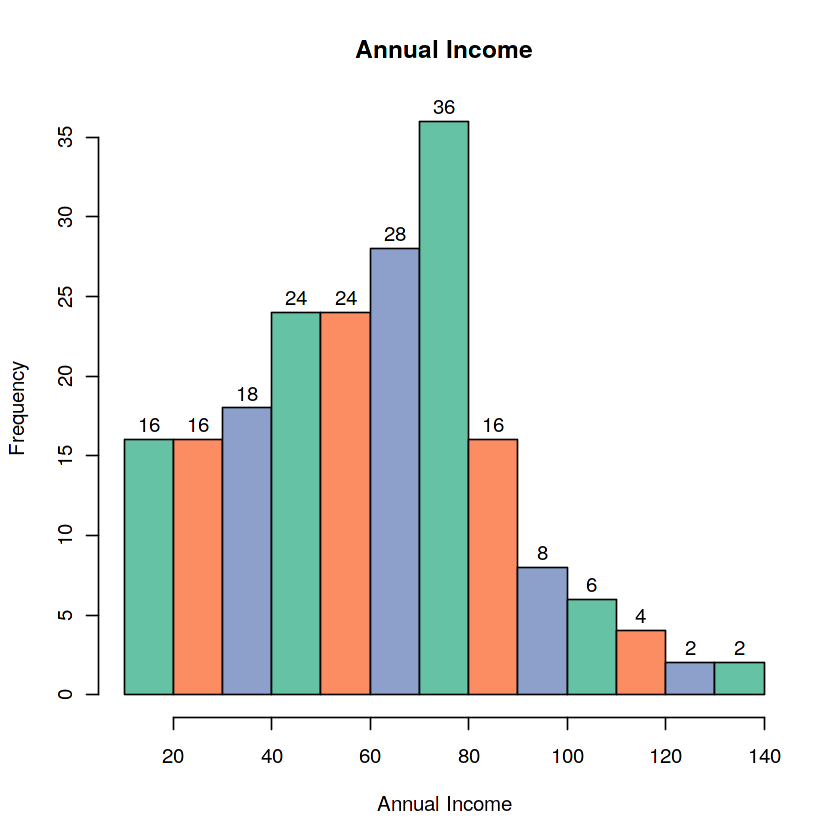

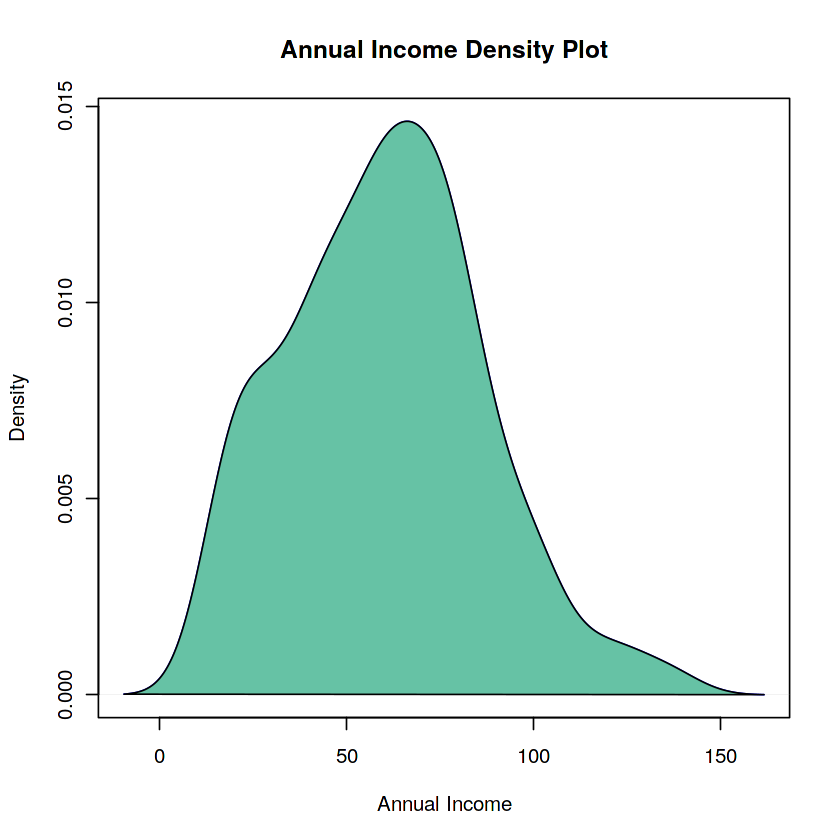

In [5]:
#ANALYSIS OF CUSTOMER ANNUAL INCOME

summary(customerData$Annual.Income..k..)

hist(customerData$Annual.Income..k..,
     col=brewer.pal(n = 3, name = 'Set2'),
     main="Annual Income",
     xlab="Annual Income",
     ylab="Frequency",
     labels=TRUE)

plot(density(customerData$Annual.Income..k..),
     col="blue",
     main="Annual Income Density Plot",
     xlab="Annual Income",
     ylab="Density")


polygon(density(customerData$Annual.Income..k..),
        col=brewer.pal(n = 3, name = 'Set2'))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   34.75   50.00   50.20   73.00   99.00 

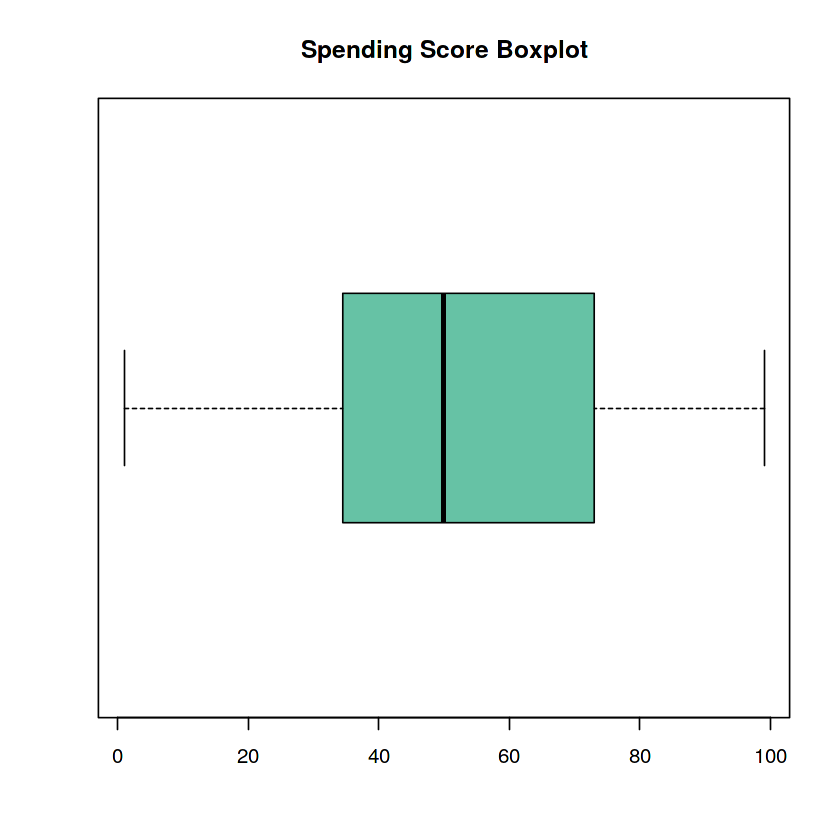

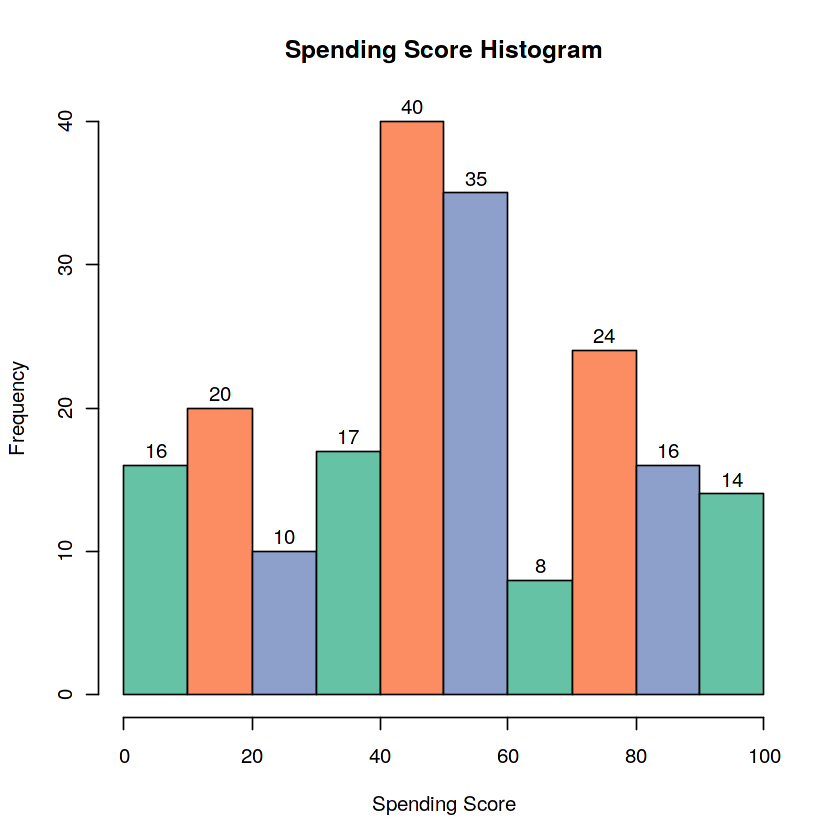

In [6]:
#ANALYZING CUSTOMER SPENDING SCORES

summary(customerData$Spending.Score..1.100.)

boxplot(customerData$Spending.Score..1.100.,
        horizontal=TRUE,
        col=brewer.pal(n = 3, name = 'Set2'),
        main="Spending Score Boxplot")

hist(customerData$Spending.Score..1.100.,
     main="Spending Score Histogram",
     xlab="Spending Score",
     ylab="Frequency",
     col=brewer.pal(n = 3, name = 'Set2'),
     labels=TRUE)

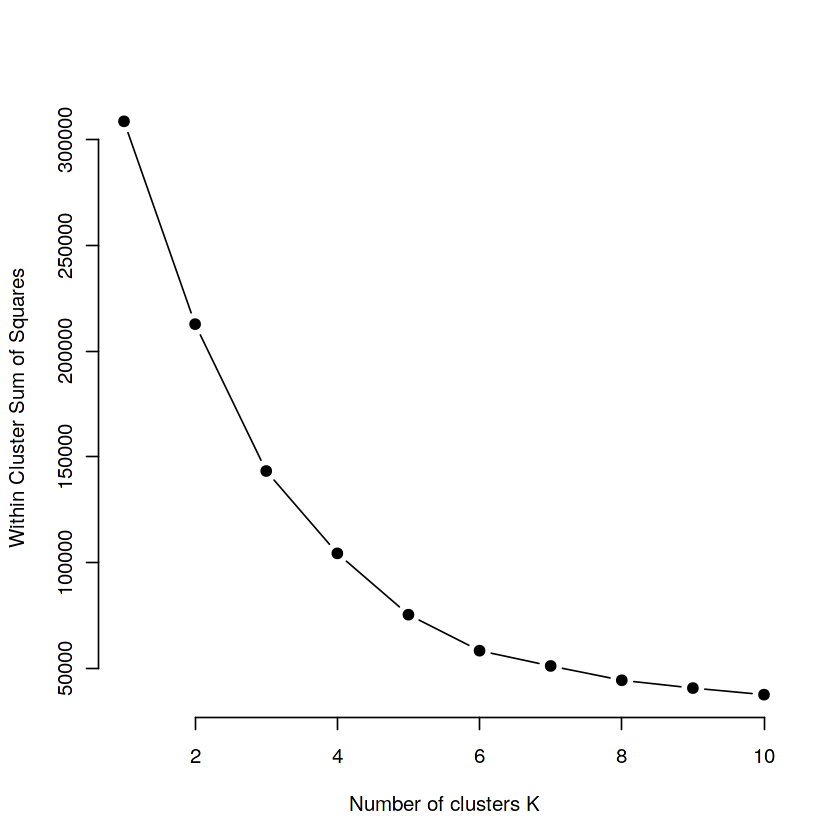

In [7]:
#K-MEANS ALGORITHM

library(purrr)

set.seed(123)

#Calculate the within cluster sum of squares
iss <- function(k) {
  kmeans(customerData[,3:5],k,iter.max=100,nstart=100,algorithm="Lloyd" )$tot.withinss
}

k.values <- 1:10

iss_values <- map_dbl(k.values, iss)

plot(k.values, iss_values,
     type="b", pch = 19, frame = FALSE, 
     xlab="Number of clusters K",
     ylab="Within Cluster Sum of Squares")

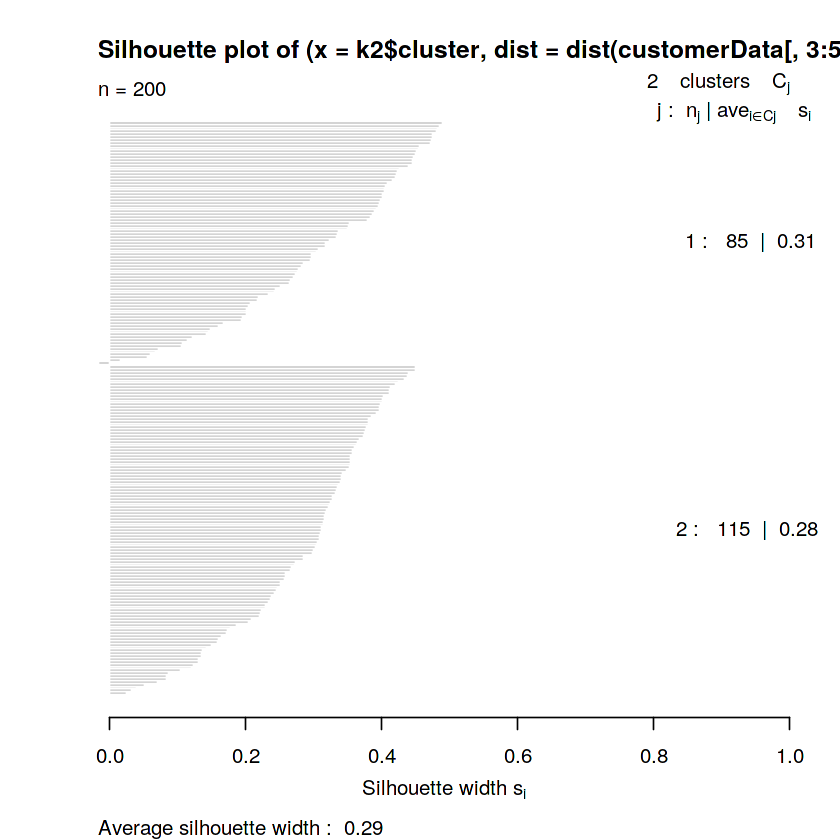

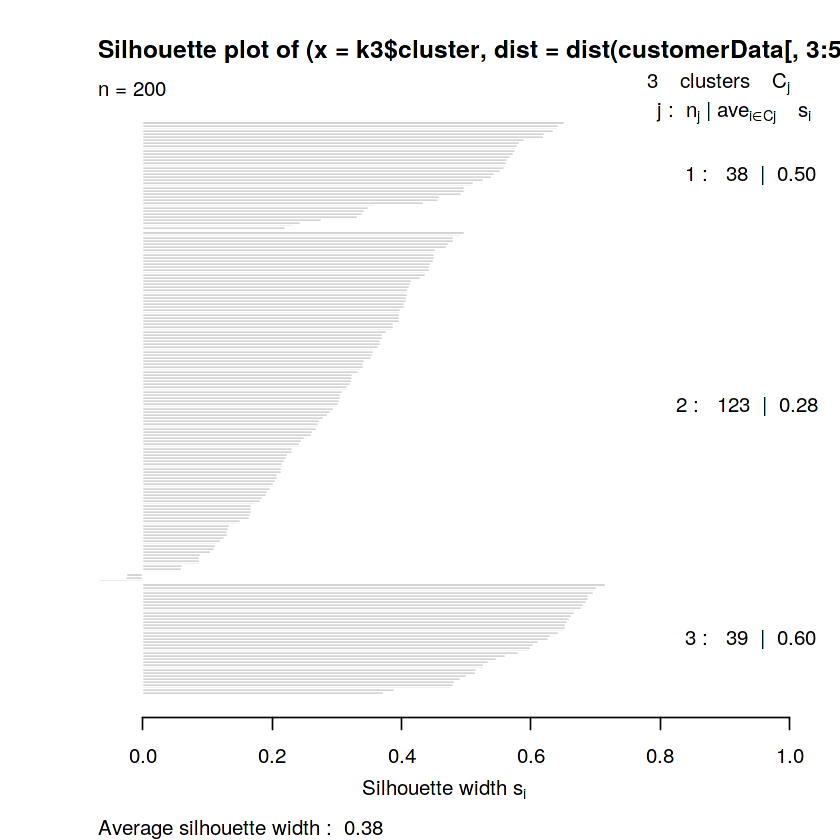

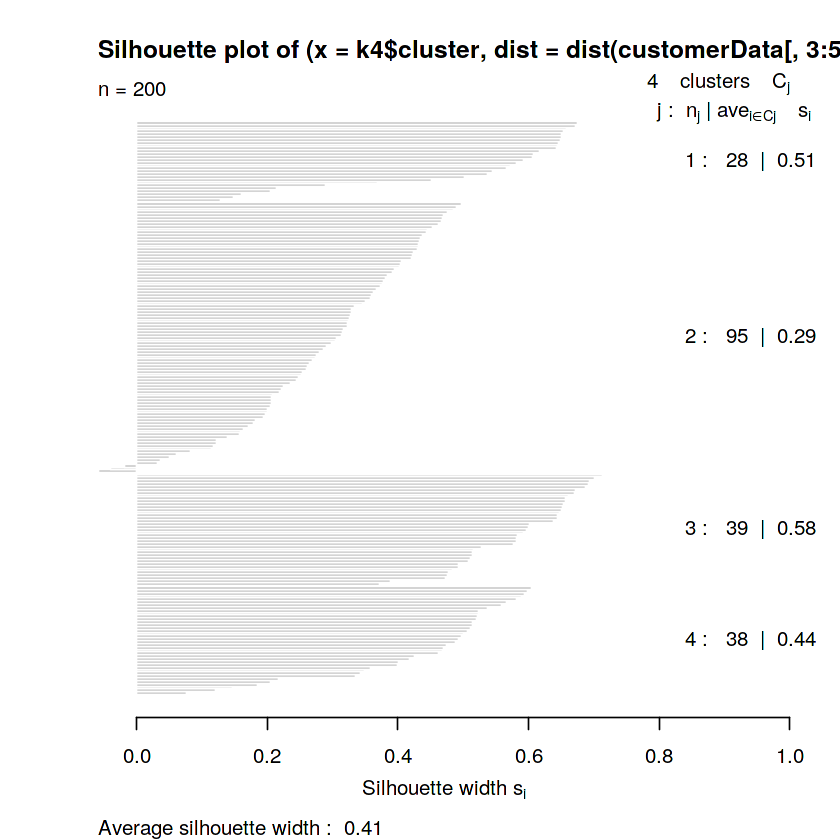

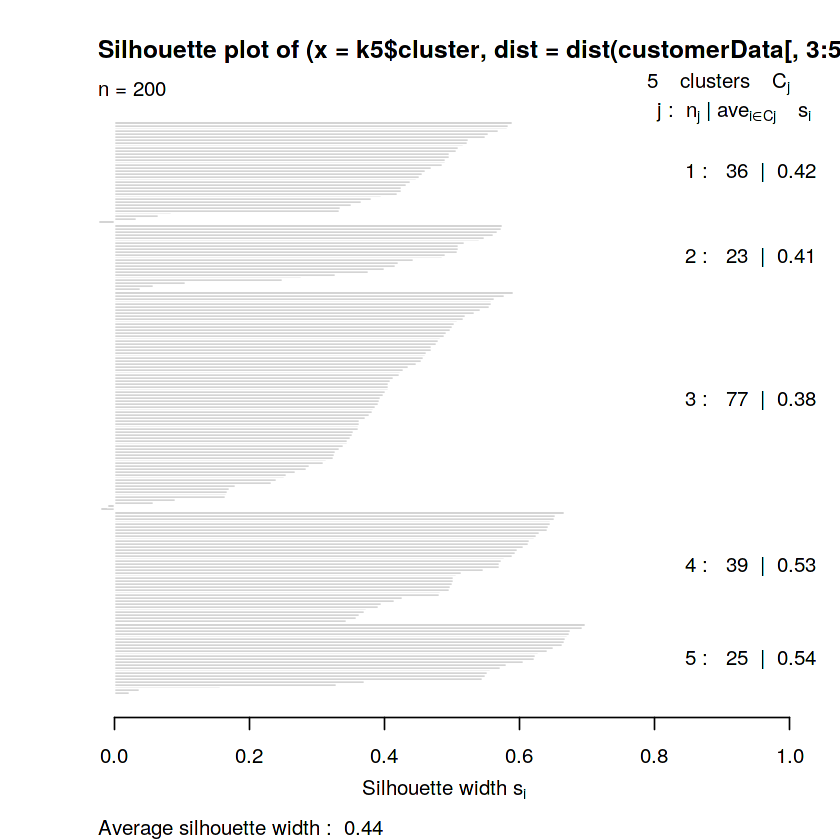

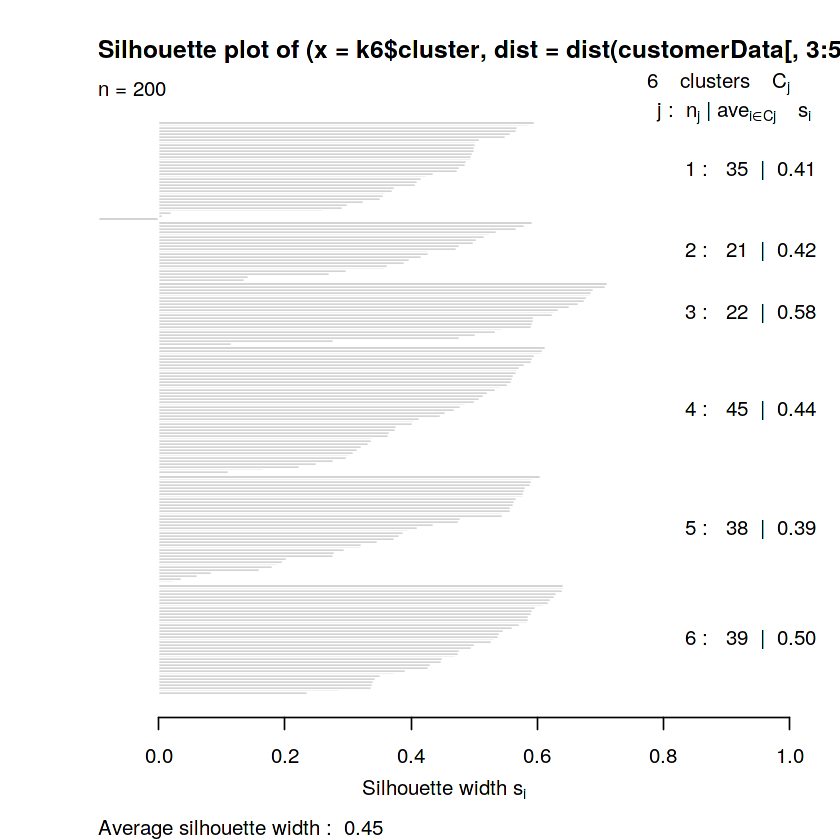

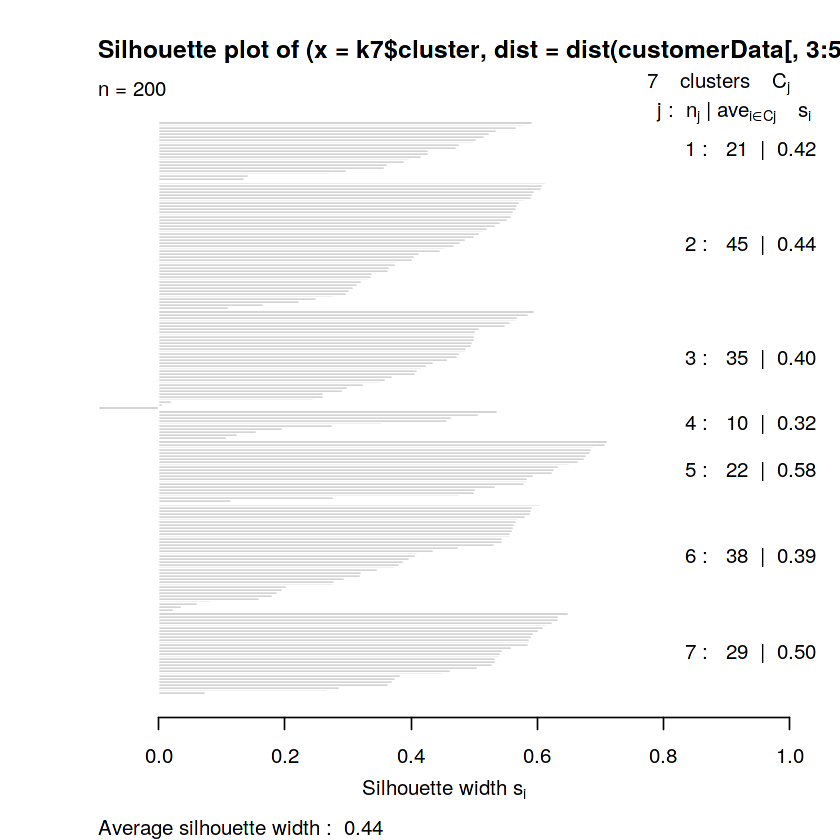

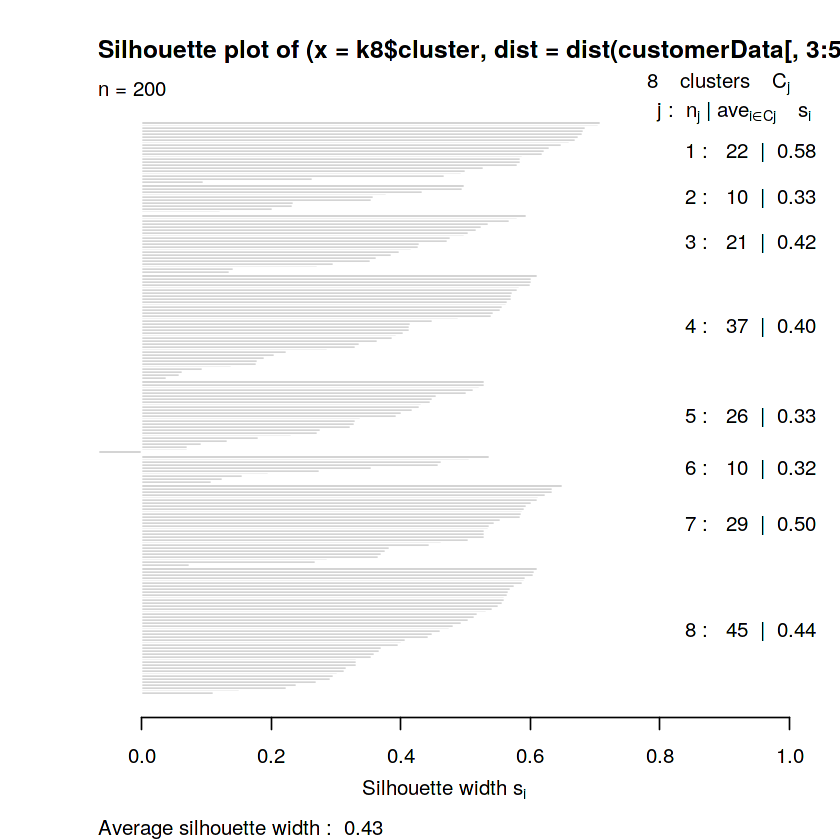

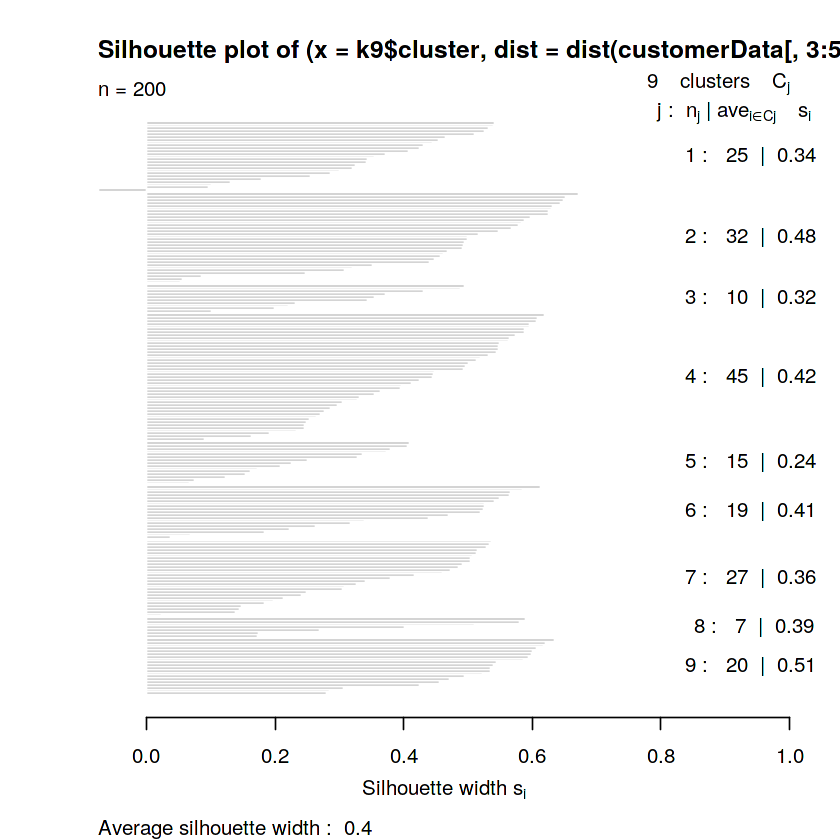

Loading required package: ggplot2


Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


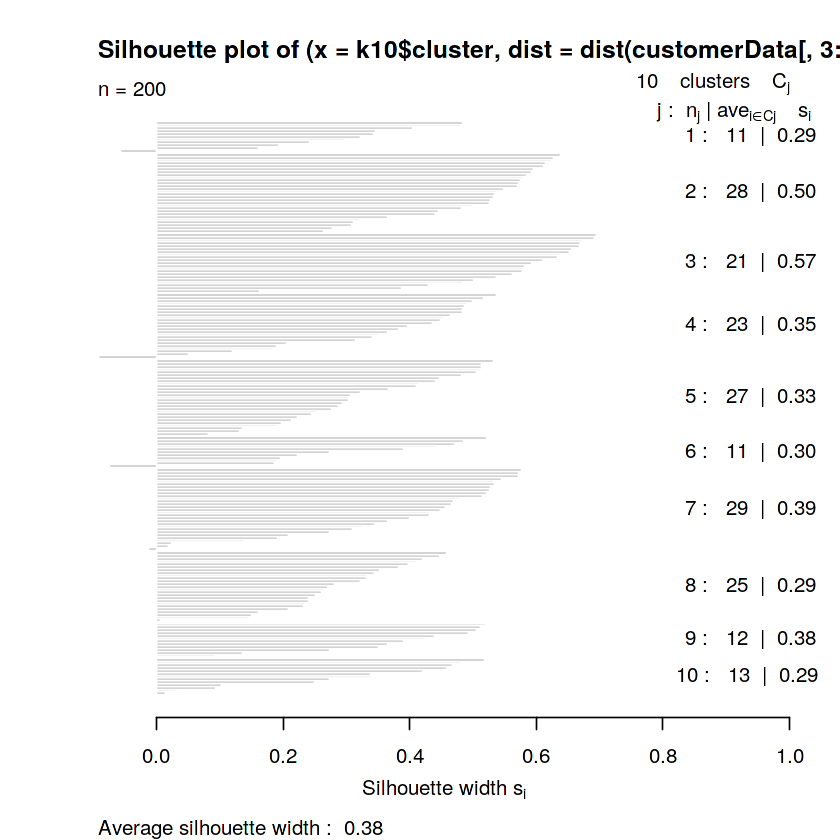

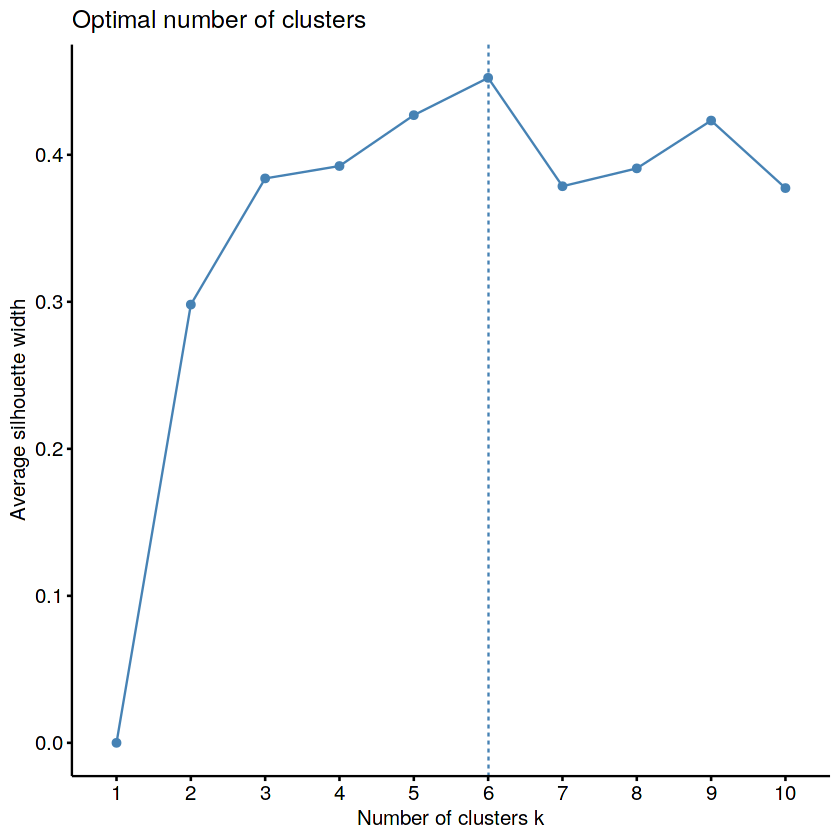

In [9]:
#AVERAGE SILHOUETTE METHOD

library(cluster)
library(gridExtra)
library(grid)

k2<-kmeans(customerData[,3:5],2,iter.max=100,nstart=50,algorithm="Lloyd")

s2<-plot(silhouette(k2$cluster,dist(customerData[,3:5],"euclidean")))

k3<-kmeans(customerData[,3:5],3,iter.max=100,nstart=50,algorithm="Lloyd")

s3<-plot(silhouette(k3$cluster,dist(customerData[,3:5],"euclidean")))

k4<-kmeans(customerData[,3:5],4,iter.max=100,nstart=50,algorithm="Lloyd")

s4<-plot(silhouette(k4$cluster,dist(customerData[,3:5],"euclidean")))

k5<-kmeans(customerData[,3:5],5,iter.max=100,nstart=50,algorithm="Lloyd")

s5<-plot(silhouette(k5$cluster,dist(customerData[,3:5],"euclidean")))

k6<-kmeans(customerData[,3:5],6,iter.max=100,nstart=50,algorithm="Lloyd")

s6<-plot(silhouette(k6$cluster,dist(customerData[,3:5],"euclidean")))

k7<-kmeans(customerData[,3:5],7,iter.max=100,nstart=50,algorithm="Lloyd")

s7<-plot(silhouette(k7$cluster,dist(customerData[,3:5],"euclidean")))

k8<-kmeans(customerData[,3:5],8,iter.max=100,nstart=50,algorithm="Lloyd")

s8<-plot(silhouette(k8$cluster,dist(customerData[,3:5],"euclidean")))

k9<-kmeans(customerData[,3:5],9,iter.max=100,nstart=50,algorithm="Lloyd")

s9<-plot(silhouette(k9$cluster,dist(customerData[,3:5],"euclidean")))

k10<-kmeans(customerData[,3:5],10,iter.max=100,nstart=50,algorithm="Lloyd")

s10<-plot(silhouette(k10$cluster,dist(customerData[,3:5],"euclidean")))


library(NbClust)
library(factoextra)

fviz_nbclust(customerData[,3:5], kmeans, method = "silhouette")


In [10]:
library(cluster)
library(tidyverse)
library(factoextra)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──


✔ tibble  3.0.3     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()


K-means clustering with 6 clusters of sizes 45, 22, 21, 38, 35, 39

Cluster means:
       Age Annual.Income..k.. Spending.Score..1.100.
1 56.15556           53.37778               49.08889
2 25.27273           25.72727               79.36364
3 44.14286           25.14286               19.52381
4 27.00000           56.65789               49.13158
5 41.68571           88.22857               17.28571
6 32.69231           86.53846               82.12821

Clustering vector:
  [1] 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 [38] 2 3 2 1 2 1 4 3 2 1 4 4 4 1 4 4 1 1 1 1 1 4 1 1 4 1 1 1 4 1 1 4 4 1 1 1 1
 [75] 1 4 1 4 4 1 1 4 1 1 4 1 1 4 4 1 1 4 1 4 4 4 1 4 1 4 4 1 1 4 1 4 1 1 1 1 1
[112] 4 4 4 4 4 1 1 1 1 4 4 4 6 4 6 5 6 5 6 5 6 4 6 5 6 5 6 5 6 5 6 4 6 5 6 5 6
[149] 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5
[186] 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6

Within cluster sum of squares by cluster:
[1]  8062.133  4099.818  7732.381  7742.895 166

[1] 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 [38] 2 3 2 1 2 1 4 3 2 1 4 4 4 1 4 4 1 1 1 1 1 4 1 1 4 1 1 1 4 1 1 4 4 1 1 1 1
 [75] 1 4 1 4 4 1 1 4 1 1 4 1 1 4 4 1 1 4 1 4 4 4 1 4 1 4 4 1 1 4 1 4 1 1 1 1 1
[112] 4 4 4 4 4 1 1 1 1 4 4 4 6 4 6 5 6 5 6 5 6 4 6 5 6 5 6 5 6 5 6 4 6 5 6 5 6
[149] 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5
[186] 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6

,Age,Annual.Income..k..,Spending.Score..1.100.
1,56.15556,53.37778,49.08889
2,25.27273,25.72727,79.36364
3,44.14286,25.14286,19.52381
4,27.00000,56.65789,49.13158
5,41.68571,88.22857,17.28571
6,32.69231,86.53846,82.12821


[1] 308812.8

[1] 58300.44

[1] 250512.3

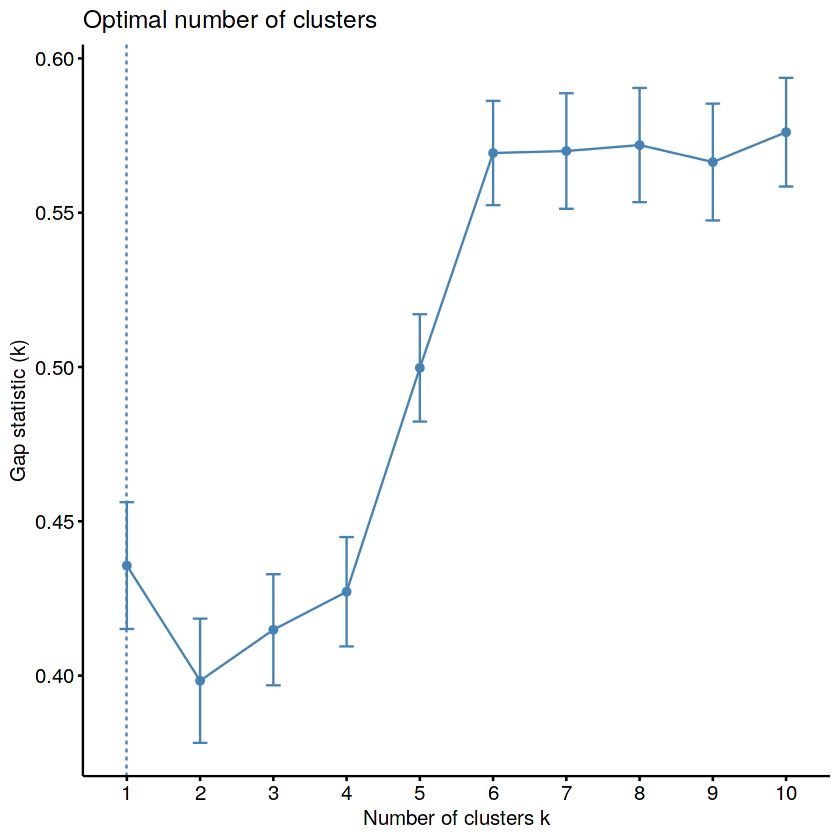

In [11]:
#GAP STATISTIC METHOD

set.seed(125)

stat_gap <- clusGap(customerData[,3:5], FUN = kmeans, nstart = 25,
                    K.max = 10, B = 50)
fviz_gap_stat(stat_gap)

k6<-kmeans(customerData[,3:5],6,iter.max=100,nstart=50,algorithm="Lloyd")
k6

k6$cluster
k6$centers
k6$totss
k6$tot.withinss
k6$betweenss

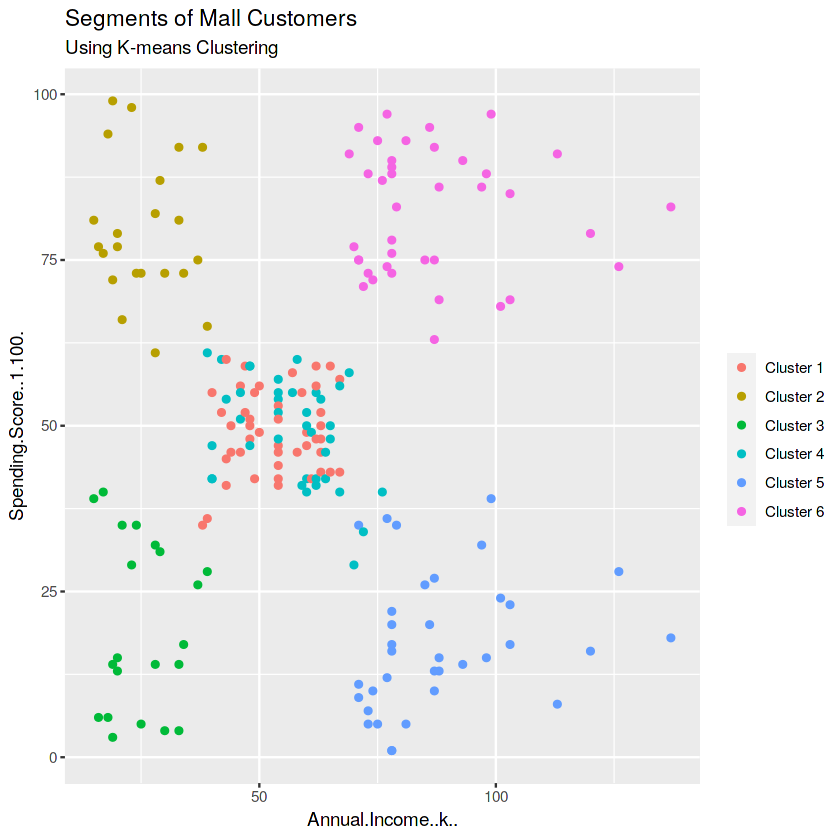

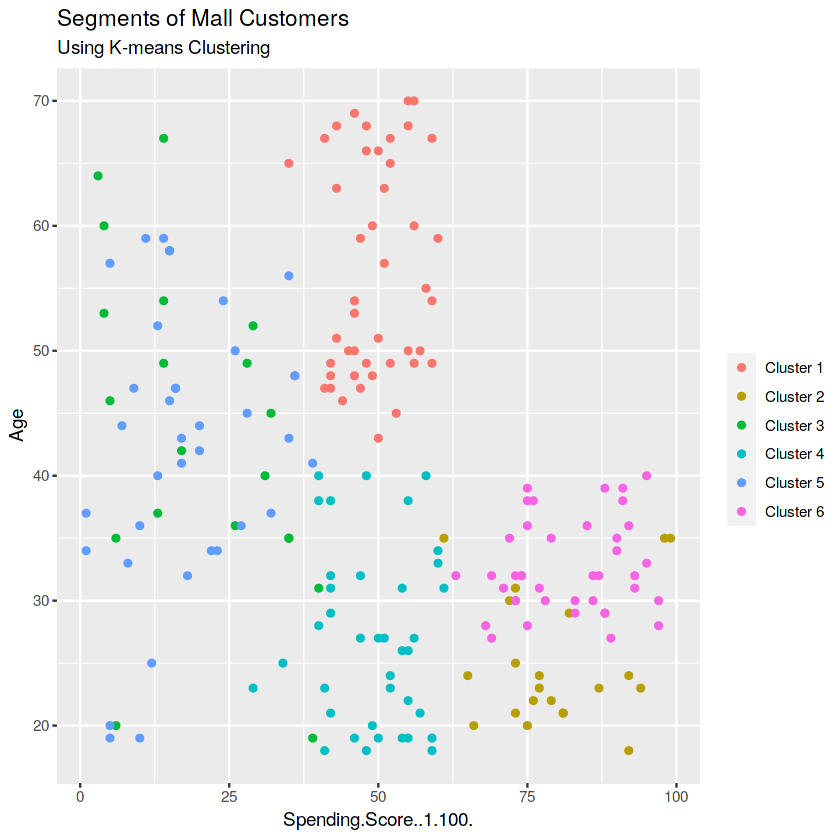

In [12]:
#VISUALIZING CLUSTER RESULTS

set.seed(1)

ggplot(customerData, aes(x =Annual.Income..k.., y = Spending.Score..1.100.)) + 
  geom_point(stat = "identity", aes(color = as.factor(k6$cluster))) +
  scale_color_discrete(name=" ",
                       breaks=c("1", "2", "3", "4", "5","6"),
                       labels=c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5","Cluster 6")) +
  ggtitle("Segments of Mall Customers", subtitle = "Using K-means Clustering")

ggplot(customerData, aes(x =Spending.Score..1.100., y =Age)) + 
  geom_point(stat = "identity", aes(color = as.factor(k6$cluster))) +
  scale_color_discrete(name=" ",
                       breaks=c("1", "2", "3", "4", "5","6"),
                       labels=c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5","Cluster 6")) +
  ggtitle("Segments of Mall Customers", subtitle = "Using K-means Clustering")